## The dataset was obtained from Kaggle(https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). It includes a comprehensive list of most famous songs in 2023 as listed on Spotify. We will perform some data cleaning and exploration and then construct some vizualizations

In [1]:
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
spotify = pd.read_csv(r"C:\Users\Davyd Voloshyn\personal_projects_workspace\spotify.csv", encoding='latin-1',)
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
spotify.shape

(953, 24)

In [4]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
spotify.dtypes
type(spotify['streams'][0]) #it is a string
#spotify['streams'] = spotify['streams'].apply(int) overflow error
#invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3' error row
spotify = spotify[spotify.streams != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
spotify['streams'] = spotify['streams'].apply(int)
type(spotify['streams'][10]) # int
spotify.dtypes

C:\Users\Davyd Voloshyn\AppData\Local\Temp\ipykernel_30104\2122544044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['streams'] = spotify['streams'].apply(int)


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [6]:
spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


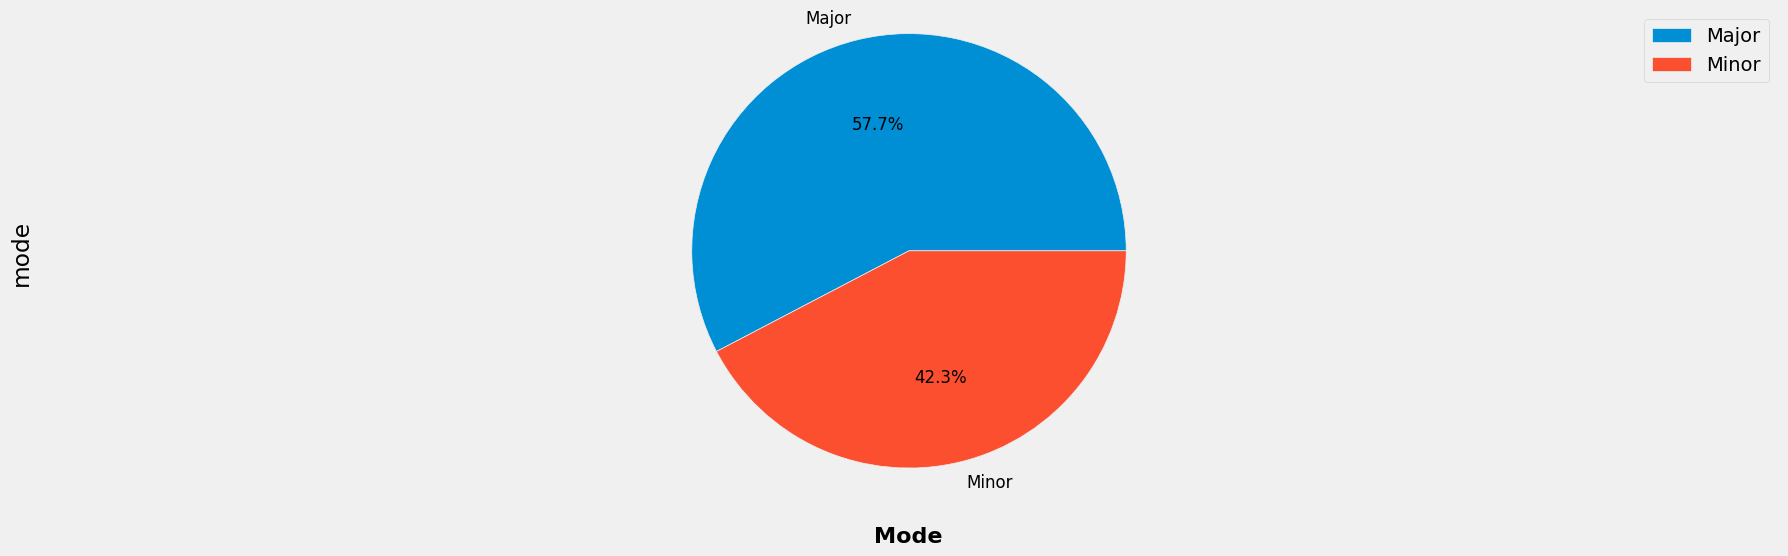

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 6))

counts = spotify['mode'].value_counts()
counts.plot(kind = 'pie', fontsize = 12, autopct = '%1.1f%%')
plt.xlabel('Mode', weight = "bold", fontsize = 16, labelpad = 22)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

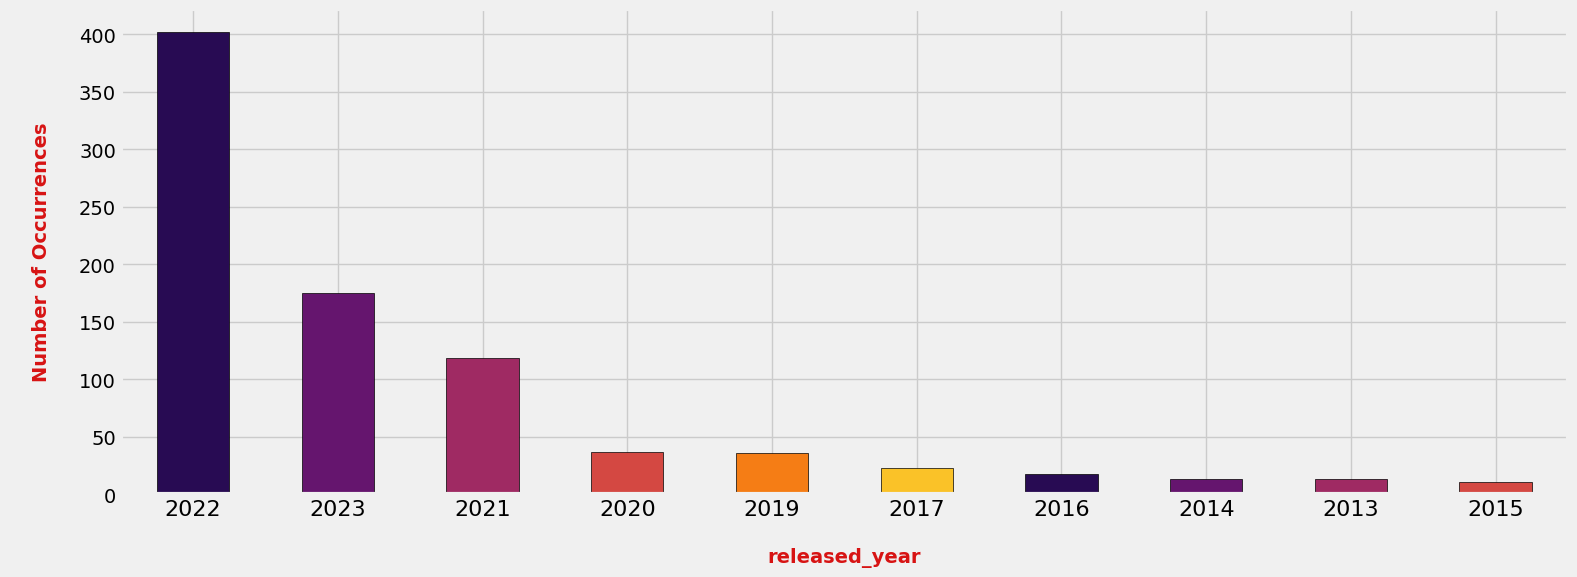

In [8]:
import seaborn as sns
plt.figure(figsize = (16, 6))
spotify["released_year"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('released_year', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [9]:
top5 = spotify.sort_values(by=['streams'], ascending=False).head(5) 
top5

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


In [11]:
import plotly.express as px
fig = px.bar(top5, x='artist(s)_name', y='in_spotify_playlists',
             hover_data=['streams', 'released_year'], color = 'streams',
             labels={'streams':'number of times the song was played'}, height=400)
fig.show()

In [12]:
fig = px.scatter_3d(spotify, x='danceability_%', y='bpm', z='streams', color='mode')
fig.show()

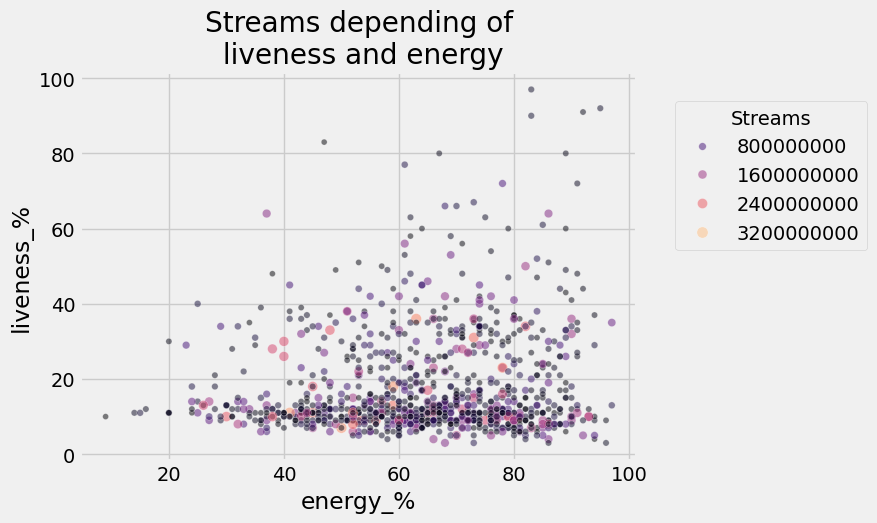

In [13]:
sns.scatterplot(
    data=spotify,
    x="energy_%",
    y="liveness_%",
    size="streams",
    hue="streams",
    palette="magma",
    alpha=0.5,
)
plots.legend(title="Streams", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plots.title("Streams depending of\n liveness and energy")

<AxesSubplot:xlabel='Count', ylabel='released_month'>

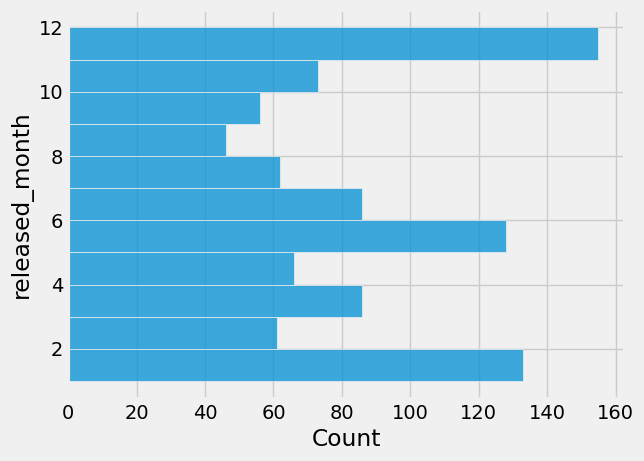

In [14]:
sns.histplot(data=spotify, y="released_month")